In [1]:
import numpy as np
def seqTrans(argument):
    switcher = {
        'A': 1,
        'T': 2,
        'G': 3,
        'C': 4,
        'N': np.random.randint(1,4)
    }
    return switcher.get(argument, "Invalid month")

def lineToArr(line):
    arr = np.array([])
    for a in line:
        v = seqTrans(a)    
        arr = np.append(arr,v)    
    return arr


import csv

l_arr = []
y =np.array([])
with open('NGS201811_Censored(updated).csv') as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')
    line_count = 0
    for row in csv_reader:
        if line_count == 0:
            #print row
            line_count += 1
        else:            
            line_count += 1
            l_arr.append(lineToArr(row[0]))
            y = np.append(y,row[2])
            
m_data = np.asmatrix(l_arr)
y = y.astype('float32')
m_data = m_data.astype('float32')
#m_data = np.expand_dims(m_data, axis=2)
#m_data=m_data.transpose()
#y = y.reshape(1,len(y))
print y.shape, m_data.shape

(171427,) (171427, 33)


In [23]:
print row[0]
s = row[0]
print type(s)
[s[i:i+3] for i in range(0, len(s), 3)]

TTTTTTTTTGCTGCCGTATAGGCAGTTATTCTC
<type 'str'>


['TTT', 'TTT', 'TTT', 'GCT', 'GCC', 'GTA', 'TAG', 'GCA', 'GTT', 'ATT', 'CTC']

In [2]:
#  Equanlization of training dataset
Equalization = False
train_ratio = 0.7
if Equalization:
    id_1 =  np.where(y==1)
    id_1 = id_1[0] 
    k = id_1.tolist()
    idx = np.random.randint(len(k),size=int(len(k)*train_ratio))
    x_train = m_data[idx,]
    y_train = y[idx,]
    print x_train.shape,y_train.shape
else:
    # No equalization of training dataset    
    idx = np.random.randint(len(y), size=int(len(y)*train_ratio))
    x_train = m_data[idx,]
    y_train = y[idx,]
    print x_train.shape,y_train.shape
    
    
from keras.utils import to_categorical

num_classes = 2

x_train = x_train.astype(int)
y_train = to_categorical(y_train,num_classes)
print y_train.shape

(119998, 33) (119998,)


/home/xsong/miniconda2/lib/python2.7/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


(119998, 2)


In [17]:
from keras.models import Sequential
from keras.layers import Dense, Flatten, Input
from keras.layers.embeddings import Embedding
from keras.models import Model
from keras.preprocessing.sequence import pad_sequences
from keras.preprocessing.text import one_hot
from keras.layers import Dense, Dropout, Flatten, Reshape, GlobalAveragePooling1D
from keras.layers import Conv2D, MaxPooling2D, Conv1D, MaxPooling1D
from keras.utils import np_utils
model = Sequential()

vocab_size=4
max_length = 33
model.add(Embedding(vocab_size, 4 , input_length=max_length))
#model.add(Flatten())
model.add(Conv1D(100, 5, activation='relu', input_shape=(33, 1)))
model.add(Conv1D(100, 5, activation='relu'))
model.add(MaxPooling1D(2))
model.add(Conv1D(100, 3, activation='relu'))
model.add(Conv1D(100, 3, activation='relu'))
model.add(GlobalAveragePooling1D())
model.add(Dropout(0.5))

model.add(Dense(2, activation='softmax'))
# compile the model 编译
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])
# summarize the model 打印模型信息
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, 33, 4)             16        
_________________________________________________________________
conv1d_13 (Conv1D)           (None, 29, 100)           2100      
_________________________________________________________________
conv1d_14 (Conv1D)           (None, 25, 100)           50100     
_________________________________________________________________
max_pooling1d_4 (MaxPooling1 (None, 12, 100)           0         
_________________________________________________________________
conv1d_15 (Conv1D)           (None, 10, 100)           30100     
_________________________________________________________________
conv1d_16 (Conv1D)           (None, 8, 100)            30100     
_________________________________________________________________
global_average_pooling1d_4 ( (None, 100)               0         
__________

In [18]:
# fit the model 拟合
import keras

BATCH_SIZE=200
EPOCHS = 50
print("\n--- Fit the model ---\n")

# The EarlyStopping callback monitors training accuracy:
# if it fails to improve for two consecutive epochs,
# training stops early
callbacks_list = [
    keras.callbacks.ModelCheckpoint(
        filepath='best_model.{epoch:02d}-{val_loss:.2f}.h5',
        monitor='val_loss', save_best_only=True),
    keras.callbacks.EarlyStopping(monitor='acc', patience=1)
]

history = model.fit(x_train,
                      y_train,
                      batch_size=BATCH_SIZE,
                      epochs=EPOCHS,
                      callbacks=callbacks_list,
                      validation_split=0.2,
                      verbose=1)
#history = model.fit(x_train, y_train, epochs=50,verbose=1)
# evaluate the model 评估
#loss, accuracy = model.evaluate(x_train, labels, verbose=0)
#print('Accuracy: %f' % (accuracy*100))


--- Fit the model ---

Train on 95998 samples, validate on 24000 samples
Epoch 1/50
95998/95998 [==============================] - 6s 68us/step - loss: 0.4969 - acc: 0.7833 - val_loss: 0.4067 - val_acc: 0.8306
Epoch 2/50
95998/95998 [==============================] - 7s 73us/step - loss: 0.3463 - acc: 0.8573 - val_loss: 0.3090 - val_acc: 0.8740
Epoch 3/50
95998/95998 [==============================] - 7s 72us/step - loss: 0.2762 - acc: 0.8865 - val_loss: 0.2548 - val_acc: 0.8964
Epoch 4/50
95998/95998 [==============================] - 5s 57us/step - loss: 0.2389 - acc: 0.9026 - val_loss: 0.2254 - val_acc: 0.9106
Epoch 5/50
95998/95998 [==============================] - 5s 47us/step - loss: 0.2141 - acc: 0.9146 - val_loss: 0.2113 - val_acc: 0.9136
Epoch 6/50
95998/95998 [==============================] - 5s 52us/step - loss: 0.1965 - acc: 0.9228 - val_loss: 0.1974 - val_acc: 0.9230
Epoch 7/50
95998/95998 [==============================] - 6s 62us/step - loss: 0.1814 - acc: 0.9288 - va

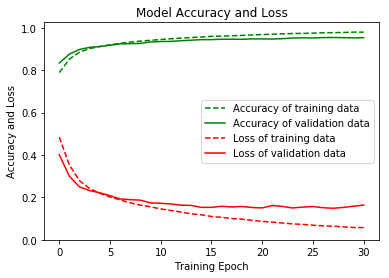

In [12]:
# summarize history for accuracy and loss
import matplotlib.pyplot as plt
plt.figure(figsize=(6, 4))
plt.plot(history.history['acc'], "g--", label="Accuracy of training data")
plt.plot(history.history['val_acc'], "g", label="Accuracy of validation data")
plt.plot(history.history['loss'], "r--", label="Loss of training data")
plt.plot(history.history['val_loss'], "r", label="Loss of validation data")
plt.title('Model Accuracy and Loss')
plt.ylabel('Accuracy and Loss')
plt.xlabel('Training Epoch')
plt.ylim(0)
plt.legend()
plt.show()

In [13]:
def show_confusion_matrix(validations, predictions):

    matrix = metrics.confusion_matrix(validations, predictions)
    plt.figure(figsize=(6, 4))
    sns.heatmap(matrix,
                cmap="coolwarm",
                linecolor='white',
                linewidths=1,
                xticklabels=LABELS,
                yticklabels=LABELS,
                annot=True,
                fmt="d")
    plt.title("Confusion Matrix")
    plt.ylabel("True Label")
    plt.xlabel("Predicted Label")
    plt.show()


--- Check against test data ---

(85111, 33) (85111,)
85111/85111 [==============================] - 6s 73us/step

Accuracy on test data: 0.94

Loss on test data: 0.24

--- Confusion matrix for test data ---



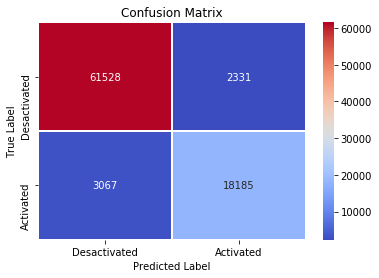


--- Classification report for test data ---

             precision    recall  f1-score   support

          0       0.95      0.96      0.96     63859
          1       0.89      0.86      0.87     21252

avg / total       0.94      0.94      0.94     85111



In [14]:
#%%
from sklearn import metrics
from sklearn.metrics import classification_report
import seaborn as sns
from scipy import stats
LABELS = ["Desactivated",
          "Activated"]

print("\n--- Check against test data ---\n")
x_test=np.delete(m_data,idx,axis=0)
y_test=np.delete(y,idx)
print x_test.shape, y_test.shape

x_test = x_test.astype("float32")
y_test = y_test.astype("float32")

y_test = np_utils.to_categorical(y_test, num_classes)

score = model.evaluate(x_test, y_test, verbose=1)

print("\nAccuracy on test data: %0.2f" % score[1])
print("\nLoss on test data: %0.2f" % score[0])

# %%

print("\n--- Confusion matrix for test data ---\n")

y_pred_test = model.predict(x_test)
# Take the class with the highest probability from the test predictions
max_y_pred_test = np.argmax(y_pred_test, axis=1)
max_y_test = np.argmax(y_test, axis=1)

show_confusion_matrix(max_y_test, max_y_pred_test)

# %%

print("\n--- Classification report for test data ---\n")

print(classification_report(max_y_test, max_y_pred_test))

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline  
# An "interface" to matplotlib.axes.Axes.hist() method
n, bins, patches = plt.hist(x=y, bins=[-0.5,0.5,1.5], color='#0504aa',
                            alpha=0.7, rwidth=0.85)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram')
#plt.text(23, 45, r'$\mu=15, b=3$')
print n
maxfreq = n.max()
# Set a clean upper y-axis limit.
#plt.ylim(ymax=np.ceil(maxfreq / 10) * 10 if maxfreq % 10 else maxfreq + 10)

In [55]:
#  Equanlization of training dataset
Equalization = False
binary_class = False
train_ratio = 0.7
if Equalization:
    id_1 =  np.where(y==1)
    id_1 = id_1[0] 
    k = id_1.tolist()
    idx = np.random.randint(len(k),size=int(len(k)*train_ratio))
    x_train = m_data[idx,]
    y_train = y[idx,]
    print x_train.shape,y_train.shape
else:
    # No equalization of training dataset    
    idx = np.random.randint(len(y), size=int(len(y)*train_ratio))
    x_train = m_data[idx,]
    y_train = y[idx,]
    print x_train.shape,y_train.shape

(119998, 33) (119998,)


In [ ]:
hotEncodeInput = False
if hotEncodeInput:
    num_sensors = 4
    x_train = to_categorical(x_train,num_sensors)
    x_train.shape
    input_shape = (TIME_PERIODS*num_sensors)
    x_train = x_train.reshape(x_train.shape[0], input_shape)
else:
    num_sensors = 1
    

In [67]:
from keras.utils import to_categorical
if binary_class:
    num_classes=1
    y_train = np.expand_dims(y_train, axis=1)
    print y_train.shape
else:
    num_classes = 2
    y_train = to_categorical(y_train,num_classes)
    print y_train.shape

(119998, 2)


In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Reshape, GlobalAveragePooling1D
from keras.layers import Conv2D, MaxPooling2D, Conv1D, MaxPooling1D
from keras.utils import np_utils
from keras.layers import LSTM
import time

TIME_PERIODS = 33
input_shape = TIME_PERIODS*num_sensors


model_m = Sequential()
model_m.add(Reshape((TIME_PERIODS, num_sensors), input_shape=(input_shape,)))
model_m.add(LSTM(units=10, activation='sigmoid',input_shape=(33, 1),return_sequences=True))

model_m.add(LSTM(units=20, activation='sigmoid',return_sequences=False))
    #model_m.add(Reshape((30, 1), input_shape=(30,)))
model_m.add(Dense(units=2, activation='tanh'))
    
start = time.time()
    #rmsprop = optimizers.RMSprop(lr=0.0001)
    #model.compile(loss="mse", optimizer=rmsprop)
    #model.compile(loss="mse", optimizer="adagrad")
model_m.compile(loss="binary_crossentropy", optimizer="rmsprop", metrics=['accuracy'])

print("Compilation Time : ", time.time() - start)


history = model_m.fit(x_train,
                      y_train,
                      batch_size=BATCH_SIZE,
                      epochs=EPOCHS,
                      callbacks=callbacks_list,
                      validation_split=0.2,
                      verbose=1)
print(model_m.summary())

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Reshape, GlobalAveragePooling1D
from keras.layers import Conv2D, MaxPooling2D, Conv1D, MaxPooling1D
from keras.utils import np_utils
from keras.layers import LSTM

TIME_PERIODS = 33
input_shape = TIME_PERIODS*num_sensors


rnn = True

model_m = Sequential()


model_m.add(Reshape((TIME_PERIODS, num_sensors), input_shape=(input_shape,)))

if rnn:
    model_m.add(LSTM(units=256, activation='sigmoid',input_shape=(33, 1)))
    model_m.add(Reshape((256, 1), input_shape=(256,)))

model_m.add(Conv1D(128, 3, activation='relu')) #, input_shape=(128, num_sensors))
model_m.add(Conv1D(128, 3, activation='relu'))
model_m.add(MaxPooling1D(3))
model_m.add(Conv1D(256, 3, activation='relu'))
model_m.add(Conv1D(256, 3, activation='relu'))
model_m.add(GlobalAveragePooling1D())
model_m.add(Dropout(0.5))

#model_m.add(LSTM(units=32, activation='relu',input_shape=(5, 100))) 

#model_m.add(LSTM(1))
model_m.add(Dense(num_classes, activation='softmax'))
print(model_m.summary())




In [ ]:
print("\n--- Fit the model ---\n")

# The EarlyStopping callback monitors training accuracy:
# if it fails to improve for two consecutive epochs,
# training stops early
callbacks_list = [
    keras.callbacks.ModelCheckpoint(
        filepath='best_model.{epoch:02d}-{val_loss:.2f}.h5',
        monitor='val_loss', save_best_only=True),
    keras.callbacks.EarlyStopping(monitor='acc', patience=1)
]

binary_class = False
if binary_class:
    model_m.compile(loss='binary_crossentropy',
                optimizer='rmsprop', metrics=['accuracy'])
else:
    model_m.compile(loss='categorical_crossentropy',
                optimizer='adam', metrics=['accuracy'])

# Hyper-parameters
BATCH_SIZE = 300
EPOCHS = 50

# Enable validation to use ModelCheckpoint and EarlyStopping callbacks.
history = model_m.fit(x_train,
                      y_train,
                      batch_size=BATCH_SIZE,
                      epochs=EPOCHS,
                      callbacks=callbacks_list,
                      validation_split=0.2,
                      verbose=1)

In [ ]:
# summarize history for accuracy and loss
plt.figure(figsize=(6, 4))
plt.plot(history.history['acc'], "g--", label="Accuracy of training data")
plt.plot(history.history['val_acc'], "g", label="Accuracy of validation data")
plt.plot(history.history['loss'], "r--", label="Loss of training data")
plt.plot(history.history['val_loss'], "r", label="Loss of validation data")
plt.title('Model Accuracy and Loss')
plt.ylabel('Accuracy and Loss')
plt.xlabel('Training Epoch')
plt.ylim(0)
plt.legend()
plt.show()

In [ ]:
def show_confusion_matrix(validations, predictions):

    matrix = metrics.confusion_matrix(validations, predictions)
    plt.figure(figsize=(6, 4))
    sns.heatmap(matrix,
                cmap="coolwarm",
                linecolor='white',
                linewidths=1,
                xticklabels=LABELS,
                yticklabels=LABELS,
                annot=True,
                fmt="d")
    plt.title("Confusion Matrix")
    plt.ylabel("True Label")
    plt.xlabel("Predicted Label")
    plt.show()

In [ ]:
#%%
from sklearn import metrics
from sklearn.metrics import classification_report
import seaborn as sns
from scipy import stats
LABELS = ["Desactivated",
          "Activated"]

print("\n--- Check against test data ---\n")
x_test=np.delete(m_data,idx,axis=0)
y_test=np.delete(y,idx)
print x_test.shape, y_test.shape

x_test = x_test.astype("float32")
y_test = y_test.astype("float32")

y_test = np_utils.to_categorical(y_test, num_classes)

score = model_m.evaluate(x_test, y_test, verbose=1)

print("\nAccuracy on test data: %0.2f" % score[1])
print("\nLoss on test data: %0.2f" % score[0])

# %%

print("\n--- Confusion matrix for test data ---\n")

y_pred_test = model_m.predict(x_test)
# Take the class with the highest probability from the test predictions
max_y_pred_test = np.argmax(y_pred_test, axis=1)
max_y_test = np.argmax(y_test, axis=1)

show_confusion_matrix(max_y_test, max_y_pred_test)

# %%

print("\n--- Classification report for test data ---\n")

print(classification_report(max_y_test, max_y_pred_test))